importing libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import time 

importing dataset

In [2]:
dataset = pd.read_csv("FRCP.csv" , encoding='windows-1252')
X = dataset.iloc[ : , :-1].values
y = dataset.iloc[ : , -1].values

In [3]:
print(X)
print(y)

[['Div1' 'Workplace Safety' ', Structural Integrity']
 ['Div1' 'Workplace Safety' ', Structural Integrity']
 ['Div9' 'Workplace Safety'
  ', Electrical Safety, Cleaning & Housekeeping']
 ...
 ['Div8' 'Workplace Safety' ', Electrical Safety']
 ['Div9' 'Workplace Safety' ', Barricading']
 ['Div9' 'Rail Road Safety' ', Road Condition']]
[4 4 4 ... 4 4 4]


In [4]:
def func1(lis) :
    
    data = []
    
    #print("original strings in dataset- ",lis)

    cols = {}
    
    for i in range(len(lis)) :
        if lis[i] in cols :
            cols[lis[i]].append(i)
        else :
            cols[lis[i]] = []
            cols[lis[i]].append(i)
    
    #print("final dict- ", cols)

    for i in range(len(lis)) :
        temp = []
        for j in range(len(cols)) :
            temp.append(0)
        data.append(temp)
    
    for c, key in enumerate(cols) :
        for r in cols[key] :
            data[r][c] = 1

    #print("data size- ", len(data), ", ", len(data[0]))          
    #print("final data- ",data)
    #print("")
    return data

In [5]:
def func2(lis) :
    
    data = []
    
    #print("original strings in dataset- ",lis)
    
    for i in range(len(lis)) :
        lis[i] = lis[i].replace(' ','');
        lis[i] = lis[i].split(',')
        lis[i].pop(0)
    
    #print("list of all attributes in each row- ", lis)
    
    cols = {}
    
    for i in range(len(lis)) :
        for j in range(len(lis[i])) :
            if lis[i][j] in cols :
                cols[lis[i][j]].append(i)
            else :
                #print(lis[i][j])
                cols[lis[i][j]] = []
                cols[lis[i][j]].append(i)
    
    #print("final dict- ", cols)
    
    for i in range(len(lis)) :
        temp = []
        for j in range(len(cols)) :
            temp.append(0)
        data.append(temp)
    
    for c, key in enumerate(cols) :
        for r in cols[key] :
            data[r][c] = 1

    #print("data size- ", len(data), ", ", len(data[0]))        
    #print("final data- ",data)
    #print("")
    return data

In [6]:
X = np.array(X)

In [7]:
dataset = pd.DataFrame(func1(X[:,0]))
d2 = pd.DataFrame(func1(X[:,1]))
d3 = pd.DataFrame(func2(X[:,2]))

dataset = pd.concat([dataset,d2],axis=1)
dataset = pd.concat([dataset,d3],axis=1)
display(dataset)
X = dataset.values

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8816,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8817,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8818,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8819,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
print(X)
print(y)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[0 0 0 ... 0 0 0]


In [10]:
c = 0
for i in range(len(y)) :
  if(y[i]==0) :
    c = c+1
print(len(y))
print(c)

8821
7470


conclusion - imbalanced data, Resampling has to be done

Over-sampling

In [11]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [12]:
#X = df.drop('Severity',axis=1)
#y = df['Severity']

from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
#negative = train_data[train_data.Severity==0]
#positive = train_data[train_data.Severity==1]
negative = train_data[train_data.iloc[ : , -1].values==0]
positive = train_data[train_data.iloc[ : , -1].values==1]

# upsample minority
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])

# check new class counts
#upsampled.Severity.value_counts()

In [13]:
display(upsampled)

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,0
2537,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3019,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6518,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2540,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3593,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1621,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4699,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
X_train = upsampled.iloc[ : , :-1].values
y_train = upsampled.iloc[ : , -1].values

In [15]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

importing ML libraries

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
smx=SGDClassifier()
lr=LogisticRegression(random_state = 0, max_iter = 300)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
dt= DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=2, min_samples_leaf=5)
km=KMeans(n_clusters=2)
rf = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
sv=SVC(kernel='poly')
xgb=XGBClassifier()
gb=GradientBoostingClassifier()
nb=GaussianNB()

importing metric libraries

In [17]:
!pip install scikit-plot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import brier_score_loss
from scikitplot.helpers import binary_ks_curve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


matrix for MABAC

In [18]:
mac = []

1. logistic regression

In [19]:
start = time.time()
lr.fit(np.array(X_train),np.array(y_train))
end = time.time()
tm = end - start
mac.append([])

2. gradient boost

In [20]:
start = time.time()
gb.fit(np.array(X_train),np.array(y_train))
end = time.time()
tm = end - start
mac.append([])

3. xg boost

In [21]:
start = time.time()
xgb.fit(np.array(X_train),np.array(y_train))
end = time.time()
tm = end - start
mac.append([])

4. SVM

In [22]:
start = time.time()
sv.fit(np.array(X_train),np.array(y_train))
end = time.time()
tm = end - start
mac.append([])

5. Naive bayes

In [23]:
start = time.time()
nb.fit(np.array(X_train),np.array(y_train))
end = time.time()
tm = end - start
mac.append([])

6. Decision tree

In [24]:
start = time.time()
dt.fit(np.array(X_train),np.array(y_train))
end = time.time()
tm = end - start
mac.append([])

7. random forest

In [25]:
start = time.time()
rf.fit(np.array(X_train),np.array(y_train))
end = time.time()
tm = end - start
mac.append([])

8. K nearest neighbours

In [26]:
start = time.time()
knn.fit(np.array(X_train),np.array(y_train))
end = time.time()
tm = end - start
mac.append([])

In [27]:
models = [lr, gb, xgb, sv, nb, dt, rf, knn]

In [28]:
for i in range(8) :
  model = models[i]
  y_pred=model.predict(np.array(X_test))
  y_test = y_test.ravel()

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

  false_positive_rate = fp / (fp + tn)
  mac[i].append(false_positive_rate)

  false_negative_rate = fn / (tp + fn)
  mac[i].append(false_negative_rate)

  false_discovery_rate = fp/ (tp + fp)
  mac[i].append(false_discovery_rate)

  accuracy = accuracy_score(y_test,y_pred)
  mac[i].append(accuracy)

  # True Negative Rate | Specificity
  true_negative_rate = tn / (tn + fp)
  mac[i].append(true_negative_rate)

  negative_predictive_value = tn/ (tn + fn)
  mac[i].append(negative_predictive_value)

  # True Positive Rate | Recall | Sensitivity
  recall = recall_score(y_test, y_pred) # or optionally tp / (tp + fn)
  mac[i].append(recall)

  # Positive Predictive Value | Precision
  precision = precision_score(y_test, y_pred) # or optionally tp/ (tp + fp)
  mac[i].append(precision)

  # F1 score (beta=1)
  f1= f1_score(y_test, y_pred) 
  mac[i].append(f1)

  # F2 score (beta=2)
  f2 = fbeta_score(y_test, y_pred, beta = 2)
  mac[i].append(f2)

  # Cohen Kappa Metric
  cohen_kappa = cohen_kappa_score(y_test, y_pred)
  mac[i].append(cohen_kappa)

  # Matthews Correlation Coefficient MCC
  matthews_corr = matthews_corrcoef(y_test, y_pred)
  mac[i].append(matthews_corr)

  # ROC AUC score
  roc_auc = roc_auc_score(y_test, y_pred)
  mac[i].append(roc_auc)

  # PR AUC score | Average precision
  avg_precision = average_precision_score(y_test, y_pred)
  mac[i].append(avg_precision) 

encoding the dependent variable

In [29]:
encoder = OneHotEncoder(sparse=False)
y_tr = y_train.reshape(-1, 1)
y_tr = encoder.fit_transform(y_tr)
y_tes = y_test.reshape(-1, 1)
y_tes = encoder.fit_transform(y_tes)

In [30]:
ep = 30
bs = 32

9. feed forward neural network

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
nn = Sequential()
nn.add(Dense(85, input_dim=(86), activation='relu'))
nn.add(Dense(54, activation='relu'))
nn.add(Dense(24, activation='relu'))
nn.add(Dense(13, activation='relu'))
nn.add(Dense(2, activation='softmax'))
nn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 85)                7395      
                                                                 
 dense_1 (Dense)             (None, 54)                4644      
                                                                 
 dense_2 (Dense)             (None, 24)                1320      
                                                                 
 dense_3 (Dense)             (None, 13)                325       
                                                                 
 dense_4 (Dense)             (None, 2)                 28        
                                                                 
Total params: 13,712
Trainable params: 13,712
Non-trainable params: 0
_________________________________________________________________


In [32]:
start = time.time()
nn.fit(X_train, y_tr, epochs=ep, batch_size=bs)
end = time.time()
tm = end - start
mac.append([])

Epoch 1/30
313/313 [==============================] - 3s 6ms/step - loss: 0.6787 - accuracy: 0.6097
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 0.6394 - accuracy: 0.6925
Epoch 3/30
313/313 [==============================] - 2s 5ms/step - loss: 0.6048 - accuracy: 0.7070
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 0.5866 - accuracy: 0.7094
Epoch 5/30
313/313 [==============================] - 2s 6ms/step - loss: 0.5769 - accuracy: 0.7167
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 0.5694 - accuracy: 0.7201
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 0.5627 - accuracy: 0.7210
Epoch 8/30
313/313 [==============================] - 1s 5ms/step - loss: 0.5560 - accuracy: 0.7244
Epoch 9/30
313/313 [==============================] - 2s 7ms/step - loss: 0.5480 - accuracy: 0.7318
Epoch 10/30
313/313 [==============================] - 2s 6ms/step - loss: 0.5415 - accuracy: 0.7353

10. simple recurrent neural network

In [33]:
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
rnn = Sequential()
rnn.add(SimpleRNN(54, input_shape=(86,1)))
rnn.add(Dense(2, activation='softmax'))
rnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 54)                3024      
                                                                 
 dense_5 (Dense)             (None, 2)                 110       
                                                                 
Total params: 3,134
Trainable params: 3,134
Non-trainable params: 0
_________________________________________________________________


In [34]:
start = time.time()
rnn.fit(X_train, y_tr, epochs=ep, batch_size=bs)
end = time.time()
tm = end - start
mac.append([])

Epoch 1/30
313/313 [==============================] - 6s 15ms/step - loss: 0.6534 - accuracy: 0.6290
Epoch 2/30
313/313 [==============================] - 5s 15ms/step - loss: 0.6311 - accuracy: 0.6715
Epoch 3/30
313/313 [==============================] - 5s 15ms/step - loss: 0.6206 - accuracy: 0.6790
Epoch 4/30
313/313 [==============================] - 5s 15ms/step - loss: 0.6119 - accuracy: 0.6846
Epoch 5/30
313/313 [==============================] - 5s 15ms/step - loss: 0.6037 - accuracy: 0.6913
Epoch 6/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5961 - accuracy: 0.6973
Epoch 7/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5907 - accuracy: 0.7020
Epoch 8/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5875 - accuracy: 0.7050
Epoch 9/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5835 - accuracy: 0.7075
Epoch 10/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5781 - accura

11. recurrent neural network with long short term memory

In [35]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
rnl = Sequential()
rnl.add(LSTM(54, input_shape=(86,1), recurrent_dropout = 0.2, dropout = 0.2))
rnl.add(Dense(2, activation='softmax'))
rnl.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
rnl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 54)                12096     
                                                                 
 dense_6 (Dense)             (None, 2)                 110       
                                                                 
Total params: 12,206
Trainable params: 12,206
Non-trainable params: 0
_________________________________________________________________


In [36]:
start = time.time()
rnl.fit(X_train, y_tr, epochs=ep, batch_size=bs)
end = time.time()
tm = end - start
mac.append([])

Epoch 1/30
313/313 [==============================] - 31s 88ms/step - loss: 0.6932 - accuracy: 0.4979
Epoch 2/30
313/313 [==============================] - 27s 85ms/step - loss: 0.6931 - accuracy: 0.5028
Epoch 3/30
313/313 [==============================] - 27s 85ms/step - loss: 0.6897 - accuracy: 0.5366
Epoch 4/30
313/313 [==============================] - 27s 85ms/step - loss: 0.6863 - accuracy: 0.5456
Epoch 5/30
313/313 [==============================] - 27s 85ms/step - loss: 0.6843 - accuracy: 0.5519
Epoch 6/30
313/313 [==============================] - 28s 89ms/step - loss: 0.6833 - accuracy: 0.5604
Epoch 7/30
313/313 [==============================] - 26s 85ms/step - loss: 0.6824 - accuracy: 0.5599
Epoch 8/30
313/313 [==============================] - 27s 85ms/step - loss: 0.6826 - accuracy: 0.5612
Epoch 9/30
313/313 [==============================] - 27s 85ms/step - loss: 0.6807 - accuracy: 0.5692
Epoch 10/30
313/313 [==============================] - 27s 86ms/step - loss: 0.682

12. convolutional neural network

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
cnn = Sequential()
cnn.add(Conv1D(54, 2, activation="relu", input_shape=(86,1)))
cnn.add(Dense(13, activation="relu"))
cnn.add(MaxPooling1D())
cnn.add(Flatten())
cnn.add(Dense(2, activation = 'softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 85, 54)            162       
                                                                 
 dense_7 (Dense)             (None, 85, 13)            715       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 42, 13)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 546)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                 1094      
                                                                 
Total params: 1,971
Trainable params: 1,971
Non-trainable params: 0
____________________________________________________

In [38]:
start = time.time()
cnn.fit(X_train, y_tr, epochs=ep, batch_size=bs)
end = time.time()
tm = end - start
mac.append([])

Epoch 1/30
313/313 [==============================] - 3s 6ms/step - loss: 0.6884 - accuracy: 0.5665
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 0.6682 - accuracy: 0.6422
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 0.6404 - accuracy: 0.6700
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 0.6195 - accuracy: 0.6891
Epoch 5/30
313/313 [==============================] - 2s 6ms/step - loss: 0.6091 - accuracy: 0.6894
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 0.6036 - accuracy: 0.6909
Epoch 7/30
313/313 [==============================] - 2s 6ms/step - loss: 0.6001 - accuracy: 0.6935
Epoch 8/30
313/313 [==============================] - 2s 6ms/step - loss: 0.5973 - accuracy: 0.6960
Epoch 9/30
313/313 [==============================] - 2s 6ms/step - loss: 0.5951 - accuracy: 0.6962
Epoch 10/30
313/313 [==============================] - 2s 6ms/step - loss: 0.5932 - accuracy: 0.6952

In [39]:
mode = [nn,rnn,rnl,cnn]
for j in range(4) :
  i = j+8
  model = mode[j]
  print(model)
  y_pred = model.predict(X_test)
  y_pred = np.array(y_pred)
  y_pred = np.rint(y_pred)
  y_p = np.zeros(y_test.size)
  for k in range(y_p.size) :
    if(y_pred[k][0]==0) : 
      y_p[k] = 1
  y_pred = y_p
  y_pred

  y_test = y_test.ravel()

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

  false_positive_rate = fp / (fp + tn)
  mac[i].append(false_positive_rate)

  false_negative_rate = fn / (tp + fn)
  mac[i].append(false_negative_rate)

  false_discovery_rate = fp/ (tp + fp)
  mac[i].append(false_discovery_rate)

  accuracy = accuracy_score(y_test,y_pred)
  mac[i].append(accuracy)

  # True Negative Rate | Specificity
  true_negative_rate = tn / (tn + fp)
  mac[i].append(true_negative_rate)

  negative_predictive_value = tn/ (tn + fn)
  mac[i].append(negative_predictive_value)

  # True Positive Rate | Recall | Sensitivity
  recall = recall_score(y_test, y_pred) # or optionally tp / (tp + fn)
  mac[i].append(recall)

  # Positive Predictive Value | Precision
  precision = precision_score(y_test, y_pred) # or optionally tp/ (tp + fp)
  mac[i].append(precision)

  # F1 score (beta=1)
  f1= f1_score(y_test, y_pred) 
  mac[i].append(f1)

  # F2 score (beta=2)
  f2 = fbeta_score(y_test, y_pred, beta = 2)
  mac[i].append(f2)

  # Cohen Kappa Metric
  cohen_kappa = cohen_kappa_score(y_test, y_pred)
  mac[i].append(cohen_kappa)

  # Matthews Correlation Coefficient MCC
  matthews_corr = matthews_corrcoef(y_test, y_pred)
  mac[i].append(matthews_corr)

  # ROC AUC score
  roc_auc = roc_auc_score(y_test, y_pred)
  mac[i].append(roc_auc)

  # PR AUC score | Average precision
  avg_precision = average_precision_score(y_test, y_pred)
  mac[i].append(avg_precision) 

91/91 [==============================] - 0s 3ms/step


MABAC 

In [40]:
df = pd.DataFrame(np.array(mac))
df.to_excel('results.xlsx', sheet_name = 'sheet-a')
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.276518,0.371882,0.711458,0.709035,0.723482,0.915941,0.628118,0.288542,0.395432,0.508443,0.237027,0.268134,0.675800,0.237576
1,0.321457,0.301587,0.720508,0.681553,0.678543,0.926479,0.698413,0.279492,0.399222,0.537334,0.233318,0.278643,0.688478,0.240889
2,0.320243,0.312925,0.723035,0.680866,0.679757,0.924051,0.687075,0.276965,0.394788,0.530091,0.228104,0.271549,0.683416,0.237702
3,0.263563,0.324263,0.685985,0.727241,0.736437,0.927115,0.675737,0.314015,0.428777,0.549208,0.279795,0.315258,0.706087,0.261315
4,0.960729,0.018141,0.845688,0.182068,0.039271,0.923810,0.981859,0.154312,0.266708,0.473742,0.006598,0.040630,0.510565,0.154261
5,0.357085,0.308390,0.743050,0.650292,0.642915,0.921114,0.691610,0.256950,0.374693,0.516774,0.197384,0.244063,0.667262,0.224429
6,0.246559,0.337868,0.675916,0.739608,0.753441,0.925871,0.662132,0.324084,0.435171,0.547842,0.290931,0.322296,0.707786,0.265772
7,0.241700,0.385488,0.687788,0.736517,0.758300,0.916789,0.614512,0.312212,0.414057,0.514818,0.266734,0.292189,0.686406,0.250257
8,0.273684,0.312925,0.690501,0.720371,0.726316,0.928571,0.687075,0.309499,0.426761,0.552315,0.275397,0.313714,0.706695,0.260056
9,0.308907,0.319728,0.717780,0.689454,0.691093,0.923701,0.680272,0.282220,0.398936,0.530598,0.235145,0.276536,0.685683,0.240423


In [41]:
mat = np.array(mac)
mat

array([[0.27651822, 0.37188209, 0.71145833, 0.7090347 , 0.72348178,
        0.91594054, 0.62811791, 0.28854167, 0.39543183, 0.50844347,
        0.2370269 , 0.26813408, 0.67579985, 0.23757622],
       [0.32145749, 0.3015873 , 0.72050817, 0.68155273, 0.67854251,
        0.92647872, 0.6984127 , 0.27949183, 0.39922229, 0.53733426,
        0.23331815, 0.27864255, 0.6884776 , 0.24088941],
       [0.32024291, 0.31292517, 0.72303473, 0.68086568, 0.67975709,
        0.92405063, 0.68707483, 0.27696527, 0.39478827, 0.53009097,
        0.22810425, 0.27154935, 0.68341596, 0.23770225],
       [0.26356275, 0.32426304, 0.68598525, 0.7272415 , 0.73643725,
        0.92711519, 0.67573696, 0.31401475, 0.42877698, 0.54920752,
        0.27979492, 0.3152579 , 0.7060871 , 0.26131539],
       [0.96072874, 0.01814059, 0.84568781, 0.18206802, 0.03927126,
        0.92380952, 0.98185941, 0.15431219, 0.26670773, 0.47374179,
        0.00659785, 0.04062959, 0.51056533, 0.15426107],
       [0.35708502, 0.30839002, 0.7

In [42]:
mm = pd.DataFrame(mat)
mx = mm.max()
mn = mm.min()
for i in range(len(mac)) :
  for j in range(3) :
    mat[i][j] = mn[j]/mat[i][j]
  for j in range(3,13) :
    mat[i][j] = mat[i][j]/mx[j]

In [43]:
from scipy.stats import gmean
w = np.ones((1,14))
w = w/16
Q = (mat+1)*w
Q = Q*w
G = gmean(Q,axis=0)
Q = Q-G

In [44]:
final = Q.sum(axis=-1)
final

array([ 0.00164887,  0.00140645,  0.00102573,  0.00468177, -0.01263091,
       -0.00112147,  0.00550162,  0.00383172,  0.00436497,  0.00151332,
       -0.00542559,  0.00139939])

In [45]:
ranks = np.zeros(final.size)
ranks[np.argsort(final)]=(final.size - np.arange(final.size))
ranks

array([ 5.,  7.,  9.,  2., 12., 10.,  1.,  4.,  3.,  6., 11.,  8.])

In [46]:
mode = ["lr","gb","xgb","svm","nb","dt","rb","knn","nn","rnn","rnl","cnn"]

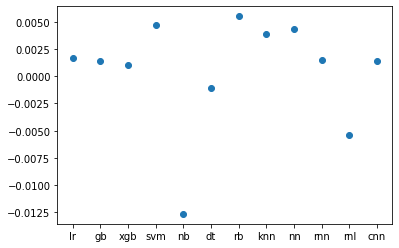

In [47]:
plt.scatter(mode, final)
plt.show()

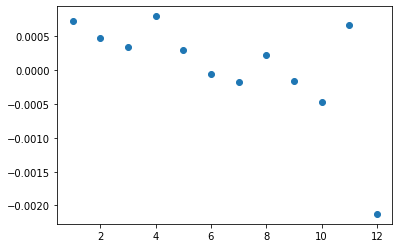

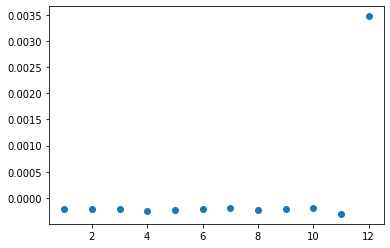

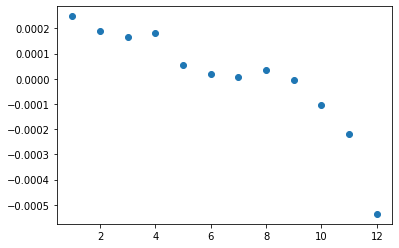

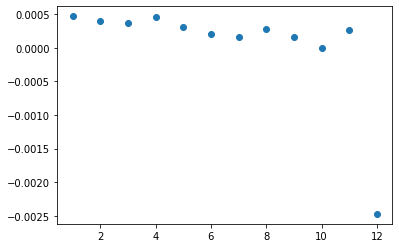

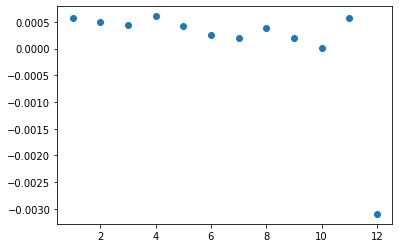

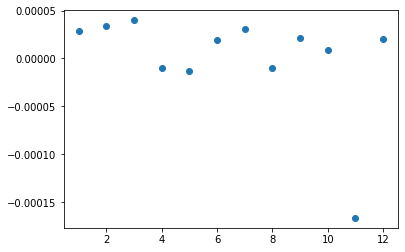

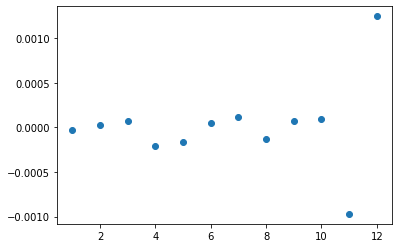

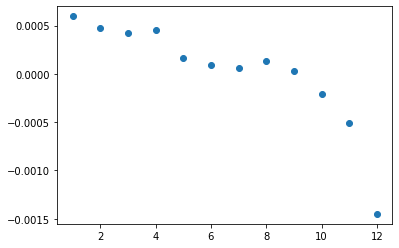

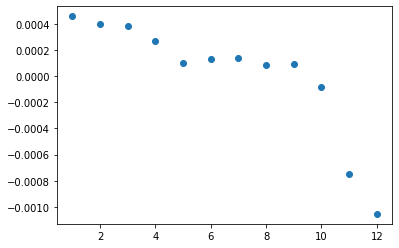

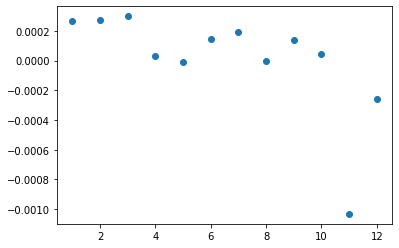

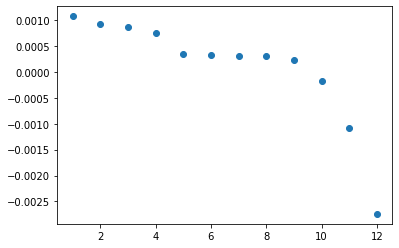

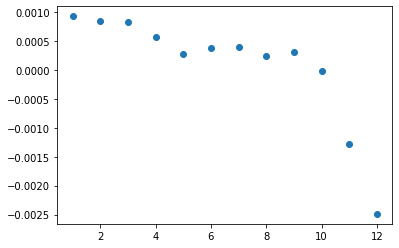

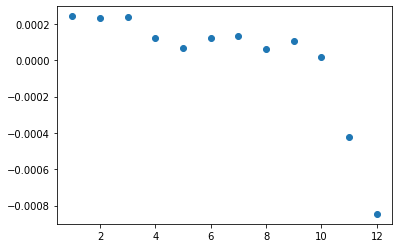

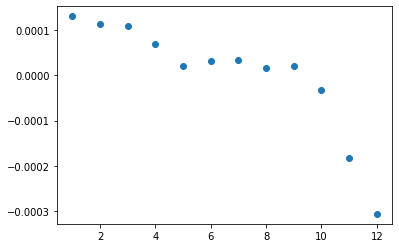

In [48]:
comp = np.zeros((final.size,2))
comp[:,0] = ranks
for i in range(len(mac[0])) :
  comp[:,1] = Q[:,i]
  plt.scatter(comp[:,0], comp[:,1])
  plt.show()